In [200]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib.colors import ListedColormap
sns.set(font_scale=1.5, style='ticks')
import pandas as pd
from scipy.stats import ttest_rel
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s', 'jGCaMP7f', 'XCaMP-Gf']
hits_colors = ['#0000ff',  '#ff0000', '#666666', '#00ff00',  '#0099ff']

In [202]:
sensor_para = pd.read_csv('GCaMP8_exported_ROIs_s2f_full/GCaMP8s_para.csv')
idx = sensor_para['Type']

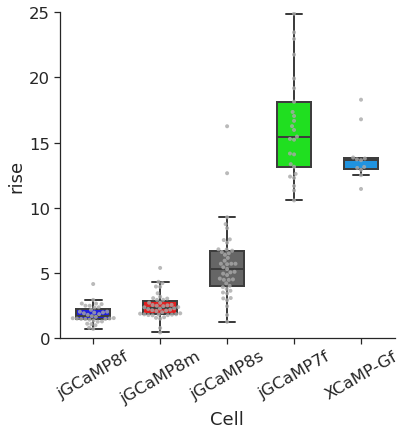

In [203]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=sensor_para[idx], x='Cell', y='rise', order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)
sns.swarmplot(data=sensor_para[idx], x='Cell', y='rise', order=hits_label, size=4, alpha=0.8, color='darkgray', 
              edgecolor = None,
              linewidth=0)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim([0, 25])
plt.savefig('figures/tau_rise.pdf')
plt.show()

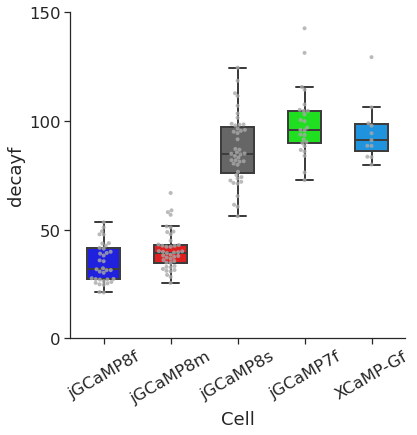

In [204]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=sensor_para[idx], x='Cell', y='decayf', order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)
sns.swarmplot(data=sensor_para[idx], x='Cell', y='decayf', order=hits_label, size=4, alpha=0.8, color='darkgray', 
              edgecolor = None,
              linewidth=0)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim([0, 150])
plt.yticks(range(0, 180, 50))
plt.savefig('figures/tau_decay_fast.pdf')
plt.show()

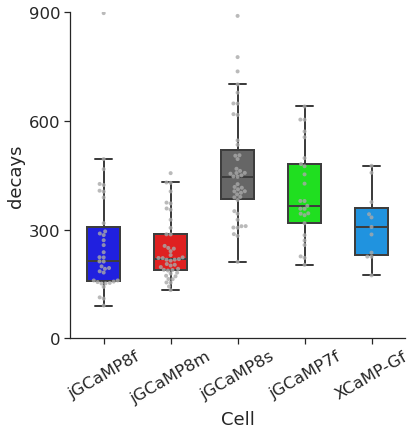

In [205]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=sensor_para[idx], x='Cell', y='decays', order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)
sns.swarmplot(data=sensor_para[idx], x='Cell', y='decays', order=hits_label, size=4, alpha=0.8, color='darkgray', 
              edgecolor = None,
              linewidth=0)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim([0, 900])
plt.yticks(range(0, 1200, 300))
plt.savefig('figures/tau_decay_slow.pdf')
plt.show()

In [206]:
size_ = sensor_para['weight'][idx]*200

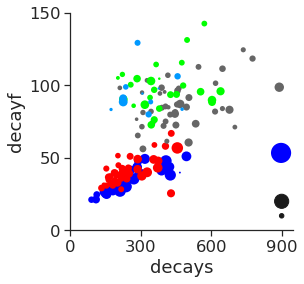

In [207]:
plt.figure(figsize=(4, 4))
ax = sns.scatterplot(data=sensor_para[idx], x='decays', y='decayf', hue='Cell', s=size_, palette = hits_colors, legend= False, linewidth=0)
plt.scatter([900, 900], [10, 20], s=[20, 200], c='k')
sns.despine()
plt.ylim([0, 150])
plt.yticks(range(0, 180, 50))
plt.xlim([0, 950])
plt.xticks(range(0, 1200, 300))
plt.savefig('figures/tau_decay.pdf')
plt.show()

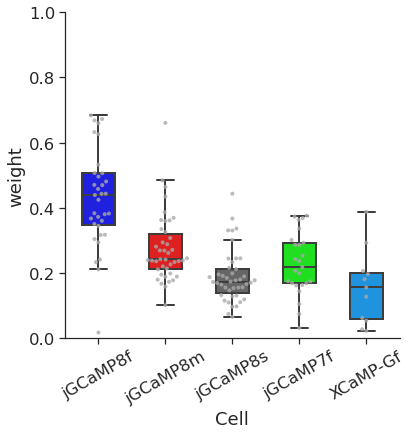

In [208]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=sensor_para[idx], x='Cell', y='weight', order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)
sns.swarmplot(data=sensor_para[idx], x='Cell', y='weight', order=hits_label, size=4, alpha=0.8, color='darkgray', 
              edgecolor = None,
              linewidth=0)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim([0, 1])
plt.savefig('figures/tau_decay_weight.pdf')
plt.show()

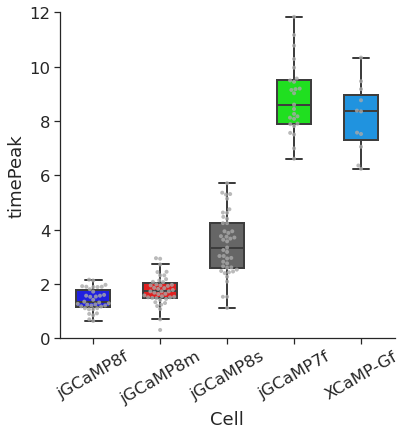

In [226]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=sensor_para[idx], x='Cell', y='timePeak', order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)
sns.swarmplot(data=sensor_para[idx], x='Cell', y='timePeak', order=hits_label, size=4, alpha=0.8, color='darkgray', 
              edgecolor = None,
              linewidth=0)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim([0, 12])
plt.savefig('figures/timePeak.pdf')
plt.show()

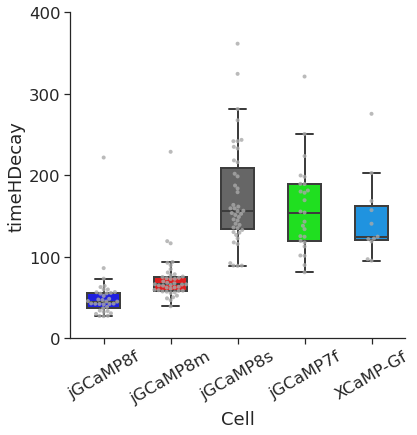

In [223]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=sensor_para[idx], x='Cell', y='timeHDecay', order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)
sns.swarmplot(data=sensor_para[idx], x='Cell', y='timeHDecay', order=hits_label, size=4, alpha=0.8, color='darkgray', 
              edgecolor = None,
              linewidth=0)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim([0, 400])
plt.yticks(range(0, 500, 100))
plt.savefig('figures/timeHDecay.pdf')
plt.show()

In [211]:
sensor_ephys_para = pd.read_csv('GCaMP8_exported_ROIs_s2f_full/GCaMP8s_para_ephys.csv')

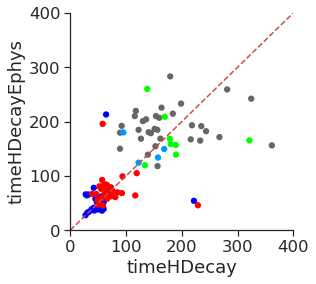

In [212]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=sensor_ephys_para, x='timeHDecay', y='timeHDecayEphys', hue='Cell', s=40, palette = hits_colors, legend= False, linewidth=0)
plt.plot([0, 500], [0, 500], '--r')
plt.ylim([0, 400])
plt.xlim([0, 400])
plt.xticks(range(0, 500, 100))
sns.despine()
plt.savefig('figures/timeHDecayEphys.pdf')
plt.show()

In [213]:
from scipy.stats import ttest_ind

In [214]:
ttest_ind(sensor_ephys_para['timeHDecay'], sensor_ephys_para['timeHDecayEphys'])

Ttest_indResult(statistic=-0.5318342133176165, pvalue=0.5954370293362728)

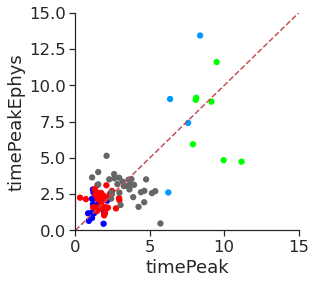

In [215]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=sensor_ephys_para, x='timePeak', y='timePeakEphys', hue='Cell', s=40, palette = hits_colors, legend= False, linewidth=0)
plt.plot([0, 30], [0, 30], '--r')
plt.ylim([0, 15])
plt.xlim([0, 15])
sns.despine()
plt.savefig('figures/timePeakEphys.pdf')
plt.show()

In [216]:
ttest_ind(sensor_ephys_para['timePeak'], sensor_ephys_para['timePeakEphys'])

Ttest_indResult(statistic=-0.22373110793379217, pvalue=0.823197212461563)

### Statistics

In [217]:
ssensor_para = sensor_para[idx].drop(columns=['Cell_ID', 'Type'])

In [218]:
mean_para = ssensor_para.groupby('Cell').mean().round(2).astype('str')
std_para = ssensor_para.groupby('Cell').std().round(2).astype('str')

In [219]:
keys_ = mean_para.keys().tolist()
results_ = mean_para.copy()
for nkey in keys_:
    results_[nkey] = mean_para[nkey] + ' ± ' + std_para[nkey]

In [220]:
results_.to_csv('tmp.csv')

In [221]:
sensor_ephys_para.groupby('Cell').mean().round(2).astype('str')

,timePeak,timeHDecay,timePeakEphys,timeHDecayEphys
Cell,,,,
XCaMP-Gf,7.14,135.89,8.13,147.0
jGCaMP7f,9.33,187.52,9.48,172.17
jGCaMP8f,1.42,52.72,1.69,55.17
jGCaMP8m,1.79,72.69,2.09,74.91
jGCaMP8s,3.36,176.3,2.96,191.33


In [222]:
sensor_ephys_para.groupby('Cell').std().round(2).astype('str')

,timePeak,timeHDecay,timePeakEphys,timeHDecayEphys
Cell,,,,
XCaMP-Gf,1.02,33.39,4.47,24.38
jGCaMP7f,1.25,58.1,5.5,43.74
jGCaMP8f,0.36,39.42,0.67,37.72
jGCaMP8m,0.55,32.65,0.53,25.31
jGCaMP8s,1.13,66.18,0.84,34.43
